# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Endhito Baraputra
- **Email:** endhitobaraputra11@gmail.com
- **ID Dicoding:** endhito

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola waktu sewa sepeda tiap musimnya ?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv('hour.csv')

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [ ]:
#mengganti nama kolom
hour_df = hour_df.rename(columns={'dteday' : 'datetime',
                                  'yr' : 'year',
                                  'mnth' : 'month',
                                  'hr' : 'hour',
                                  'weathersit' : 'weather',
                                  'cnt' : 'total'})

In [ ]:
#Convert datetime
hour_df['datetime'] = pd.to_datetime(hour_df["datetime"])

In [ ]:
#Convert category
hour_df['season'] = hour_df.season.astype('category')
#Convert nilai
hour_df['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}, inplace=True)

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   datetime    17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  int64         
 4   mounth      17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  total       17379 non-

In [ ]:
hour_df.head()

,instant,datetime,season,year,mounth,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore hour_df

In [44]:
#total sewa berdasarkan jam dan musim
seasonal_hourly_rentals = hour_df.groupby(['season', 'hour'])['total'].sum().reset_index()

In [42]:
seasonal_hourly_rentals

,season,hour,total
0,Spring,0,4878
1,Spring,1,3229
2,Spring,2,2175
3,Spring,3,1108
4,Spring,4,490
...,...,...,...
91,Winter,19,52575
92,Winter,20,37549
93,Winter,21,28555
94,Winter,22,21871


In [ ]:
seasonal_hourly_rentals[seasonal_hourly_rentals['season'] == "Spring"].reset_index(drop=True).sort_values(by='total', ascending=False)

,season,hour,total
17,Spring,17,47780
18,Spring,18,43110
8,Spring,8,42095
16,Spring,16,32999
19,Spring,19,29837
13,Spring,13,28175
15,Spring,15,28018
12,Spring,12,27131
14,Spring,14,26605
9,Spring,9,26316


In [ ]:
seasonal_hourly_rentals[seasonal_hourly_rentals['season'] == "Summer"].reset_index(drop=True).sort_values(by='total', ascending=False)

,season,hour,total
17,Summer,17,95468
18,Summer,18,88904
8,Summer,8,69945
19,Summer,19,65994
16,Summer,16,63831
13,Summer,13,52022
15,Summer,15,51382
12,Summer,12,51252
14,Summer,14,48903
20,Summer,20,47285


In [ ]:
seasonal_hourly_rentals[seasonal_hourly_rentals['season'] == "Fall"].reset_index(drop=True).sort_values(by='total', ascending=False)

,season,hour,total
17,Fall,17,107562
18,Fall,18,102330
8,Fall,8,79204
19,Fall,19,78383
16,Fall,16,69516
20,Fall,20,58505
12,Fall,12,56458
13,Fall,13,55656
15,Fall,15,54221
14,Fall,14,53060


In [ ]:
seasonal_hourly_rentals[seasonal_hourly_rentals['season'] == "Spring"].reset_index(drop=True).sort_values(by='total', ascending=False)

,season,hour,total
17,Spring,17,47780
18,Spring,18,43110
8,Spring,8,42095
16,Spring,16,32999
19,Spring,19,29837
13,Spring,13,28175
15,Spring,15,28018
12,Spring,12,27131
14,Spring,14,26605
9,Spring,9,26316


In [39]:
#total sewa bedasarkan cuaca
hour_df.groupby(by="weather").agg({
    "total": "sum"
})

,total
weather,
1,2338173
2,795952
3,158331
4,223


In [ ]:
hour_df.to_csv('hour_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan pola waktu sewa sepeda tiap musimnya ?

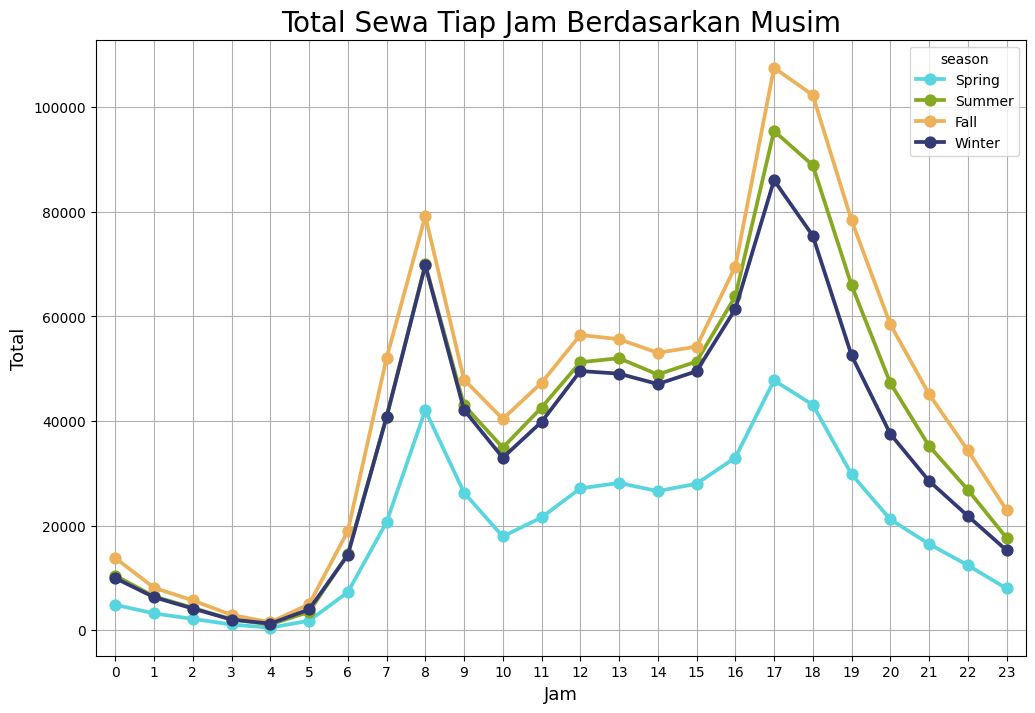

In [ ]:
# Definisikan warna untuk setiap musim
season_colors = {"Spring": "#59D5E0", "Summer": "#87A922", "Fall": "#ECB159",  "Winter": "#333A73"}

# Buat plot menggunakan seaborn
fig, ax = plt.subplots(figsize=(12, 8))

sns.pointplot(data=hour_df.groupby(by=[hour_df["hour"], hour_df['season']]).agg({
                "total": "sum"
                }).reset_index(),
              x='hour',
              y='total',
              hue='season',
              palette=season_colors,
              ax=ax)

# Atur judul plot
ax.set_title('Total Sewa Tiap Jam Berdasarkan Musim', fontsize=20)

# Atur label sumbu x dan sumbu y
ax.set_xlabel('Jam', fontsize=13)
ax.set_ylabel('Total', fontsize=13)

# Aktifkan grid
ax.grid(True)

# Tampilkan plot
plt.show()

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

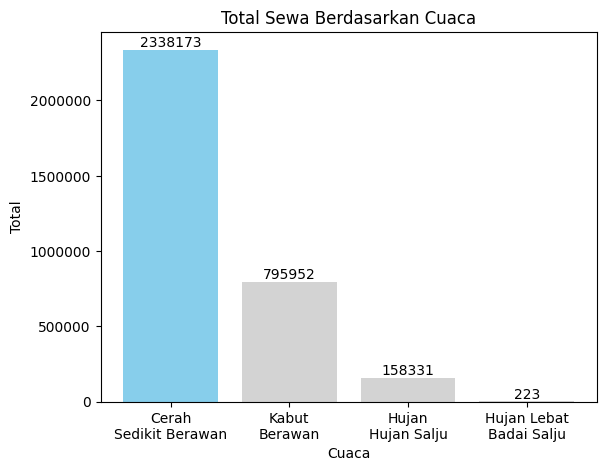

In [ ]:
# hitung total penyewaan sepeda berdasarkan cuaca
byweather = hour_df.groupby('weather')['total'].sum()
max_count = byweather.max()

# Ubah warna
colors = ['lightgray'] * len(byweather)
max_index = byweather[byweather == max_count].index[0]
colors[byweather.index.get_loc(max_index)] = 'skyblue'

# Bar Chart
plt.bar(range(len(byweather)), byweather, color=colors)
plt.xlabel('Cuaca')
plt.ylabel('Total')
plt.title('Total Sewa Berdasarkan Cuaca')

# Tambahkan nilai di atas setiap batang
for i, value in enumerate(byweather):
    plt.text(i, value, str(int(value)), ha='center', va='bottom')

# Mengganti label sumbu x
plt.xticks(range(len(byweather)), ['Cerah\nSedikit Berawan', 'Kabut\nBerawan', 'Hujan\nHujan Salju', 'Hujan Lebat\nBadai Salju'])

# Mengubah format sumbu y
plt.ticklabel_format(style='plain', axis='y')

plt.show()

## Conclusion

- Conclution pertanyaan 1 <br>
  Pengaruh musim tidak terlalu berdampak terhadap pola waktu sewa sepeda. Dimana setiap musimnya waktu sore hari menjadi waktu paling aktif untuk penyewaan sepeda. Terdapat juga aktivitas yang signifikan dalam penyewaan sepeda pada jam 8 pagi pada tiap musim.

- Conclution pertanyaan 2 <br>
  Kondisi cuaca berpengaruh besar terhadap jumlah penyewaan sepeda. Data menujukan saat cuaca cerah atau sedikit berawan berkontribusi tinggi dalam penyewaan sepeda.